# Breast Cancer Wisconsin Classifier Project (Logistic_Regression)
## 위스콘신 유방암 진단 예측
- 암이 양성인지 악성인지 예측
- 위스콘신 대학교에서 제공한 유방암 진단 결과 데이터 세트

#### feature (22개)
- (1) ID번호
- (3-32) 각 세포핵에 대해 10개의 실제 값 특징이 계산됩니다.
- (a) 반경(중심에서 주변의 점까지 거리의 평균)
- (b) 텍스처(그레이 스케일 값의 표준 편차)
- (c) 주변
- (d) 면적
- (e) 매끄러움(반경 길이의 국지적 변화)
- (f) 컴팩트함(주변 ^2) / 면적 - 1.0)
- (g) 오목함(윤곽의 오목한 부분의 심각도)
- (h) 오목한 점(윤곽의 오목한 부분의 수)
- (i) 대칭
- (j) 프랙탈 차원("해안선 근사" - 1)(
)

#### target
- (2) 진단명(M = 악성, B = 양성)

In [1]:
import pandas as pd

# 데이터 세트 호출
b_df = pd.read_csv('./datasets/Breast_Cancer_Wisconsin.csv')
b_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

In [3]:
# 데이터 정보 확인
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
b_df.shape

(569, 32)

In [5]:
# 데이터 컬럼명 확인
b_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# 타겟 데이터 비중 확인
b_target = b_df['diagnosis'].value_counts().reset_index()
b_target

,diagnosis,count
0,B,357
1,M,212


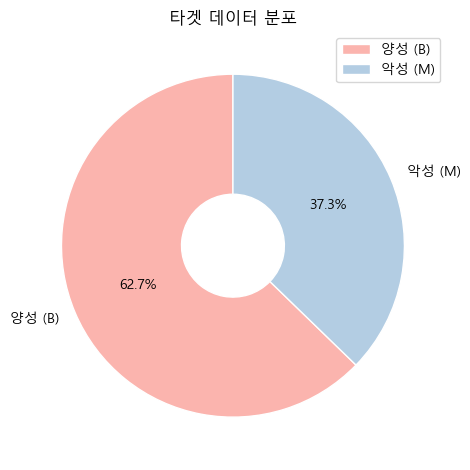

In [7]:
# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

b_counts = b_target['count']
b_labels = b_target['diagnosis']

# 새로운 라벨 리스트 생성
new_labels = ['양성 (B)' if label == 'B' else '악성 (M)' for label in b_labels]

# 그래프 그리기
plt.pie(b_counts, labels=new_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('타겟 데이터 분포')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# 결측치 확인
b_df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# null 값 확인
b_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# 중복행 확인
b_df.duplicated().sum()

0

#### 📊 전처리

In [11]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_d_df = b_df.drop(labels='id', axis=1)
pre_d_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
from sklearn.preprocessing import LabelEncoder

# 데이터 프레임 복제
enc_b_df = pre_d_df.copy()

# 레이블 인코더 객체 생성
encoder = LabelEncoder()
# 문자열 데이터 정수로 형변환
enc_b_df.diagnosis = encoder.fit_transform(enc_b_df.diagnosis)

enc_b_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
# 원본 데이터 확인
encoder.classes_

array(['B', 'M'], dtype=object)

In [14]:
# 타겟 데이터 위치 변경
enc_b_df['target'] = enc_b_df.diagnosis
enc_b_df = enc_b_df.drop(labels='diagnosis', axis=1)
enc_b_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


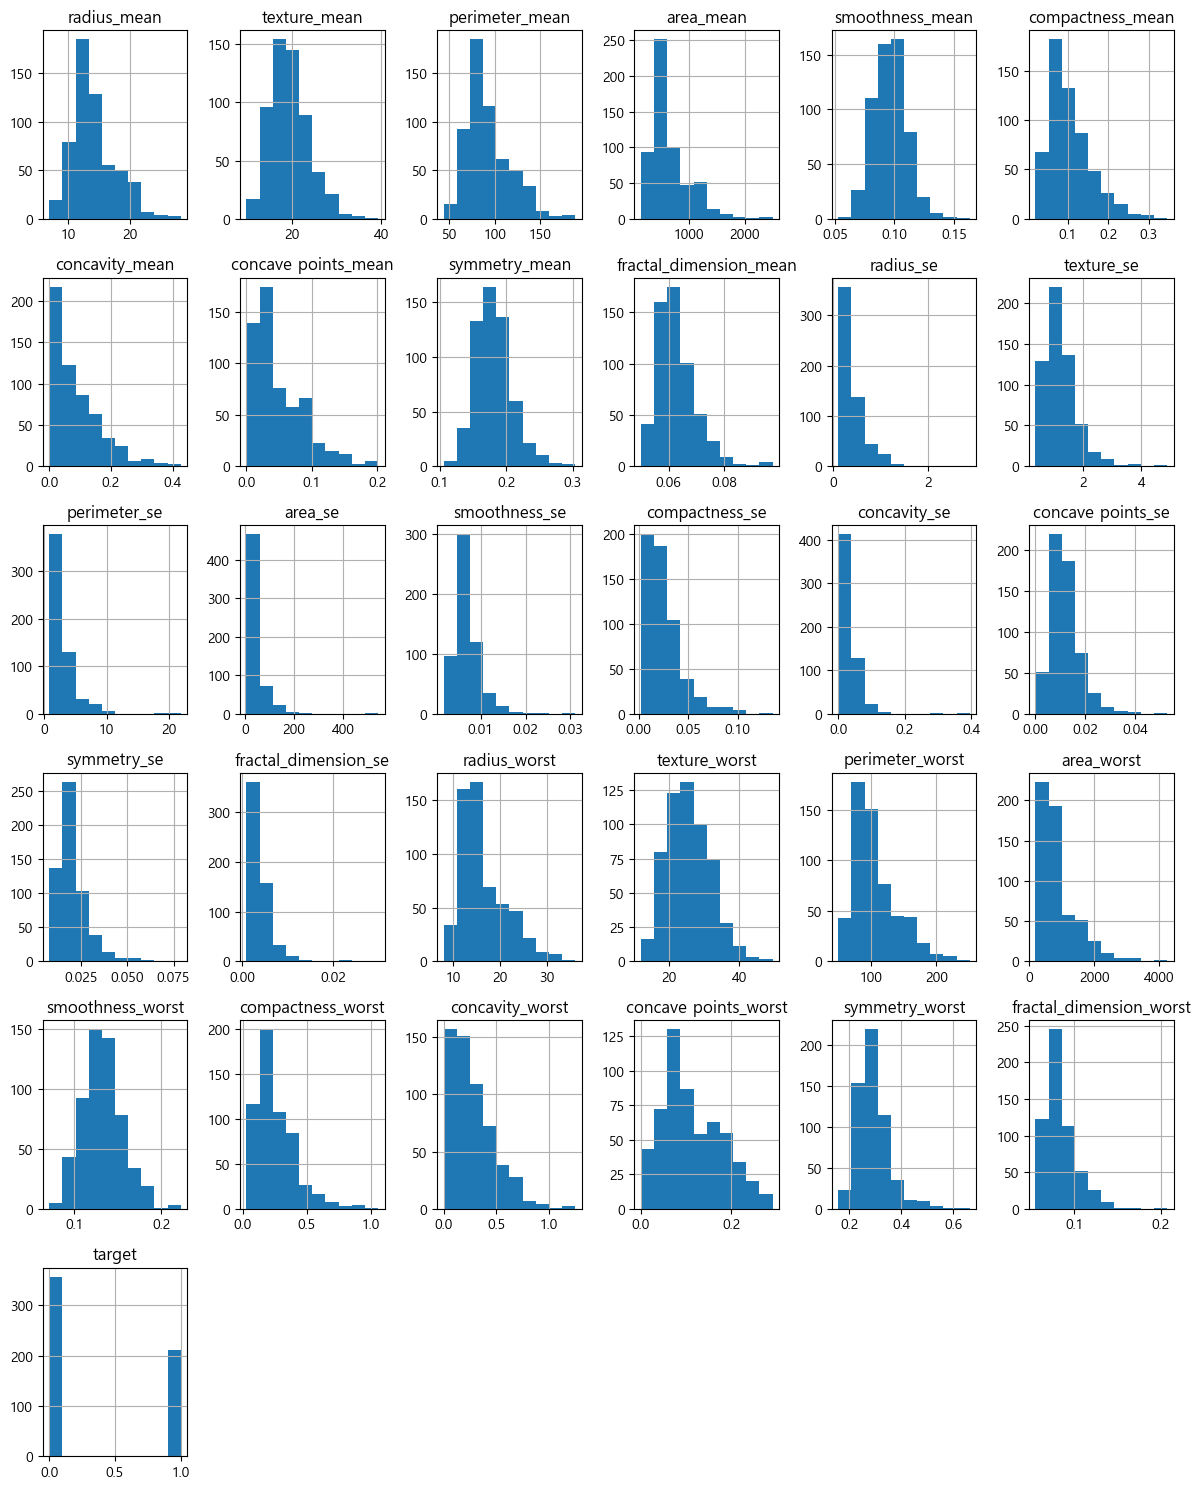

In [15]:
# 데이터 분포 확인
enc_b_df.hist(figsize=(12, 15))

plt.tight_layout()
plt.show()

In [16]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_b_df.iloc[:, :-1], enc_b_df.iloc[:, -1]

# 객체 생성
model = OLS(targets, features)
# 학습 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              103.9
Date:                Mon, 13 May 2024   Prob (F-statistic):                   1.78e-202
Time:                        01:44:31   Log-Likelihood:                          18.089
No. Observations:                 569   AIC:                                      23.82
Df Residuals:                     539   BIC:                                      154.1
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [17]:
# 상관관계 확인
enc_b_df.corr()['target'].sort_values(ascending=False)[1:]

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    return vif

In [19]:
get_vif(features)

,vif_score,features
0,63306.172036,radius_mean
1,251.047108,texture_mean
2,58123.586079,perimeter_mean
3,1287.262339,area_mean
4,393.398166,smoothness_mean
5,200.980354,compactness_mean
6,157.855046,concavity_mean
7,154.241268,concave points_mean
8,184.426558,symmetry_mean
9,629.679874,fractal_dimension_mean


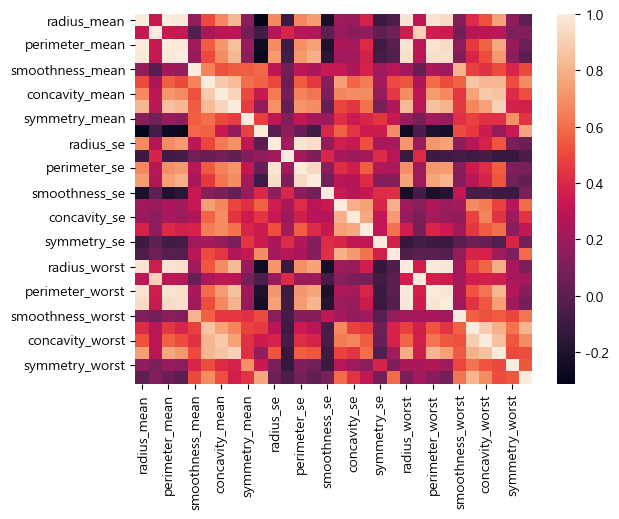

In [20]:
import seaborn as sns

sns.heatmap(features.corr())
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_b_df.iloc[:, :-1], enc_b_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 클래스 불균형 문제를 해결하기 위한 오버샘플링 기법
smote = SMOTE()
# 타겟의 비중 맞추기
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train_over, y_train_over)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[67  5]
 [ 2 40]]
정확도: 0.9386, 정밀도: 0.8889, 재현율: 0.9524, F1:0.9195, AUC:0.9415
###########################################################################


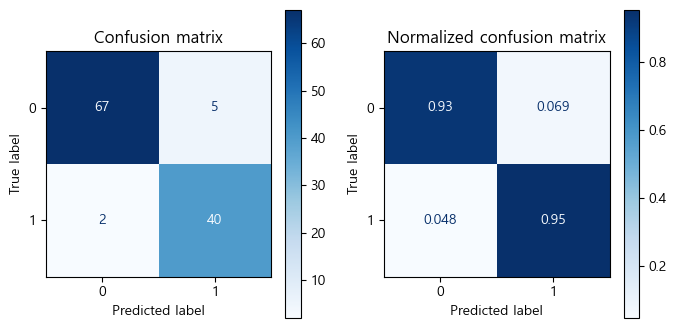

In [23]:
get_evaluation(y_test, prediction, lg, X_test)

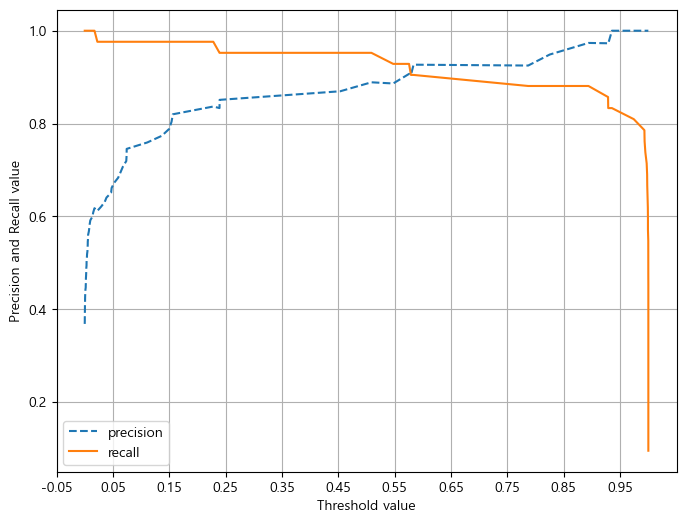

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

In [25]:
# 임계값 확인
_, _, thresholds = precision_recall_curve(y_test, lg.predict_proba(X_test)[:, 1])
thresholds

array([3.65146721e-05, 8.19586642e-05, 1.55729816e-04, 1.55750565e-04,
       1.58218695e-04, 2.73236249e-04, 2.89177901e-04, 2.92918457e-04,
       3.42635380e-04, 3.93707165e-04, 3.96410293e-04, 4.44306099e-04,
       5.84887064e-04, 5.90898907e-04, 6.20688030e-04, 6.72063584e-04,
       7.75430468e-04, 9.20100606e-04, 1.15656696e-03, 1.28431487e-03,
       1.78723244e-03, 1.85343407e-03, 2.05281639e-03, 2.08166030e-03,
       2.14243325e-03, 2.40218878e-03, 2.60722893e-03, 2.71338279e-03,
       2.81414209e-03, 3.22962262e-03, 3.30014011e-03, 3.40295064e-03,
       3.90997873e-03, 4.15910971e-03, 4.84569407e-03, 5.03290842e-03,
       5.34876688e-03, 5.43014674e-03, 5.90973369e-03, 5.98545765e-03,
       7.32877221e-03, 8.17669528e-03, 8.84681568e-03, 9.93465451e-03,
       1.38375869e-02, 1.51234912e-02, 1.73362221e-02, 2.24651594e-02,
       2.92497695e-02, 3.53708444e-02, 3.86394885e-02, 4.67950058e-02,
       4.77669705e-02, 5.21260740e-02, 5.93376517e-02, 6.34925264e-02,
      

In [26]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [27]:
# 임계값 조정
get_evaluation_by_thresholds(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임곗값: 3.651467205923752e-05
오차 행렬
[[ 1 71]
 [ 0 42]]
정확도: 0.3772, 정밀도: 0.3717, 재현율: 1.0000, F1:0.5419, AUC:0.5069
###########################################################################
임곗값: 8.195866422634286e-05
오차 행렬
[[ 2 70]
 [ 0 42]]
정확도: 0.3860, 정밀도: 0.3750, 재현율: 1.0000, F1:0.5455, AUC:0.5139
###########################################################################
임곗값: 0.00015572981621997847
오차 행렬
[[ 3 69]
 [ 0 42]]
정확도: 0.3947, 정밀도: 0.3784, 재현율: 1.0000, F1:0.5490, AUC:0.5208
###########################################################################
임곗값: 0.00015575056511781788
오차 행렬
[[ 4 68]
 [ 0 42]]
정확도: 0.4035, 정밀도: 0.3818, 재현율: 1.0000, F1:0.5526, AUC:0.5278
###########################################################################
임곗값: 0.0001582186953176064
오차 행렬
[[ 5 67]
 [ 0 42]]
정확도: 0.4123, 정밀도: 0.3853, 재현율: 1.0000, F1:0.5563, AUC:0.5347
###########################################################################
임곗값: 0.00027323624907123694
오차 행렬
[[ 6 66]
 [ 0 42]]


C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 시나리오: 암 환자가 양성인지 악성인지 분류하는 의료 진단

- 음성(Negative): 양성 환자를 의미.
- 양성(Positive): 악성 환자를 의미.


#### 문제 1: 유방암 진단

>True Positive (TP): 모델이 악성 환자를 악성으로 올바르게 분류한 경우.  
False Positive (FP): 모델이 양성 환자를 악성으로 잘못 분류한 경우(오진, error I).  
True Negative (TN): 모델이 양성 환자를 양성으로 올바르게 분류한 경우.  
False Negative (FN): 모델이 악성 환자를 양성으로 잘못 분류한 경우(놓침, error II).  

>정밀도 (Precision): 모델이 악성으로 예측한 환자 중에서 실제로 악성인 환자의 비율을 나타낸다. 즉, 양성 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정한다.  
재현율 (Recall): 실제 악성 환자 중에서 모델이 악성으로 정확하게 예측한 환자의 비율을 나타낸다. 즉, 모델이 얼마나 많은 악성 환자를 "놓치지 않고" 감지했는지 측정한다.  

> 🏆임계치를 낮춰서 재현율을 높여주는 것이 적합하다.

임곗값: 0.1329392576787388  
오차 행렬  
[[64  8]  
 [ 1 41]]  
정확도: 0.9211, 정밀도: 0.8367, 재현율: 0.9762, F1:0.9011, AUC:0.9325

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[60 12]
 [ 1 41]]
정확도: 0.8860, 정밀도: 0.7736, 재현율: 0.9762, F1: 0.8632, ROC-AUC: 0.9048
################################################################################


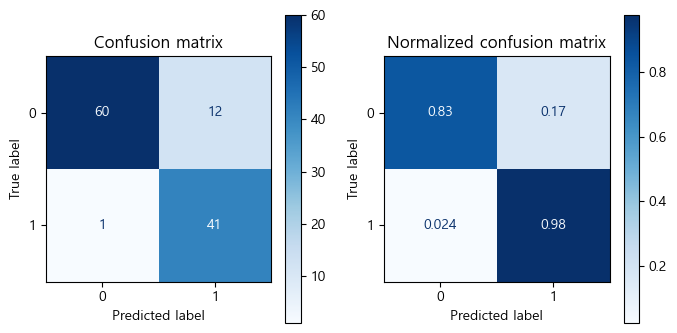

In [29]:
binarizer = Binarizer(threshold=0.133)
custom_prediction = binarizer.fit_transform(lg.predict_proba(X_test)[:, 1].reshape(-1, 1))
get_evaluation_by_custom_proba(y_test, custom_prediction, True)